In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

# Problem 1

## a) 

Taylor series for $f(x + \delta) - f(x - \delta)$:

$
f(x + \delta) - f(x - \delta) \simeq f_0(x) + f'(x) \delta + f''(x) \frac{\delta^2}{2} + f'''(x) \frac{\delta^3}{6} + f^{(4)}(x) \frac{\delta^4}{24} + f^{(5)}(x) \frac{\delta^5}{120} - \left(f_0(x) - f'(x) \delta + f''(x) \frac{\delta^2}{2} - f'''(x) \frac{\delta^3}{6} + f^{(4)}(x) \frac{\delta^4}{24} - f^{(5)}(x) \frac{\delta^5}{120}\right) = 2 \delta f'(x) + \frac{\delta^3}{3} f'''(x) + \frac{\delta^5}{60} \;
$

Same approach for $f(x + 2 \delta) - f(x - 2 \delta)$:

$
f(x + 2 \delta) - f(x - 2 \delta) \simeq ... = 4 \delta f'(x) + \frac{8 \delta^3}{3} f'''(x) + \frac{32 \delta^5}{60} \;
$

To cancel $f'''$ let's do 8 * (first eq.) - (second eq.):

$
8 * (f(x + \delta) - f(x - \delta)) - (f(x + 2 \delta) - f(x - 2 \delta)) = ... = 16 \delta f'(x) + \frac{8 \delta^3}{3} f'''(x) + \frac{8 \delta^5}{60} - 4 \delta f'(x) - \frac{8 \delta^3}{3} f'''(x) - \frac{32 \delta^5}{60} = 12 \delta f'(x) - \frac{12}{30} f^{(5)}(x)
$

Finally, after dropping $f^{(5)}(x)$:

$
f'(x) = \frac{8 \cdot(f(x + \delta) - f(x - \delta)) - f(x + 2 \delta) + f(x - 2 \delta)}{12 \delta}
$

## b)

Truncation error:

$
e_t = \frac{1}{30} \delta^4 f^{(5)}(x)
$

Roundoff error:

$
e_r = \frac{\left( \frac{8 f(x) g_+ \epsilon}{\delta} - \frac{8 f(x) g_- \epsilon}{\delta} - \frac{f(x) g_{2+} \epsilon}{\delta} + \frac{f(x) g_{2-} \epsilon}{\delta}\right)}{12 \delta} = \frac{f(x) \epsilon}{\delta^2} \left( \frac{8}{12} (g_+ - g_-) + \frac{1}{12} (g_{2-} - g_{2+}) \right)
$

The worst case scenario is when $g_+ = 1$, $g_- = -1$, $g_{2-} = 1 $, $ g_{2+} = -1$:

$
e_r = \frac{f(x) \epsilon}{\delta^2} \left( \frac{16}{12} + \frac{2}{12} \right) = \frac{3}{2} \frac{f(x) \epsilon}{\delta^2}
$

Full error then:

$
e = e_t + e_r
$

$
\frac{d e}{dx} = \frac{4}{30} \delta^3 f^{(5)}(x) - \frac{3}{2}  \frac{\varepsilon f(x)}{\delta^2} = 0
$

$
\delta = \left( \frac{90}{8} \frac{\varepsilon f(x)}{f^{(5)}(x)} \right)^{1/5} \simeq 1.6 \left(\frac{\varepsilon f(x)}{f^{(5)}(x)} \right)^{1/5} 
$

For $\exp (a x)$:

$
f^{(5)}(ax) = a^5 \exp (ax)
$

$
\delta = \frac{1.6}{a} \varepsilon^{1/5}
$

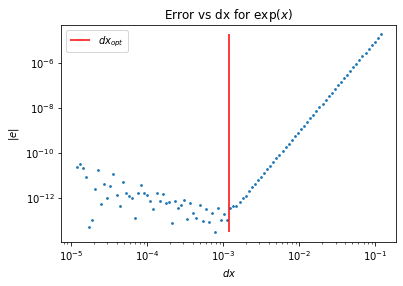

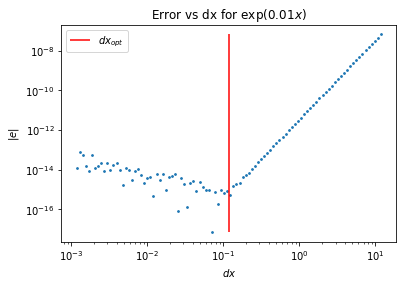

In [22]:
def four_point_drv(func, x, dx):
    """
    Implementation of four-point derivative from notes
    """
    return (8 * (func(x + dx) - func(x - dx)) - func(x + 2 * dx) + func(x - 2 * dx)) / (12 * dx)


# Constants
eps = np.finfo(np.float64).eps
x0 = 1
a1 = 1
a2 = 0.01

f1 = lambda x: np.exp(a1 * x)
f2 = lambda x: np.exp(a2 * x)

# exp(x)
dx_opt1 = 1.6 * np.power(eps, 0.2) / a1
dx1 = np.logspace(np.log10(dx_opt1) - 2, np.log10(dx_opt1) + 2, 100)
dfdx1 = four_point_drv(f1, x0, dx1)
err1 = np.abs(dfdx1 - f1(x0) * a1)

plt.scatter(dx1, err1, s = 3)
plt.vlines(dx_opt1, np.min(err1), np.max(err1), color='r', label=r"$dx_{opt}$")
plt.title(r"Error vs dx for $\exp(x)$")
plt.ylabel(r"$|e|$")
plt.xlabel(r"$dx$")
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()


# exp(0.01 x)
dx_opt2 = 1.6 * np.power(eps, 0.2) / a2
dx2 = np.logspace(np.log10(dx_opt2) - 2, np.log10(dx_opt2) + 2, 100)
dfdx2 = four_point_drv(f2, x0, dx2)
err2 = np.abs(dfdx2 - f2(x0) * a2)

plt.scatter(dx2, err2, s = 3)
plt.vlines(dx_opt2, np.min(err2), np.max(err2), color='r', label=r"$dx_{opt}$")
plt.title(r"Error vs dx for $\exp(0.01 x)$")
plt.ylabel(r"$|e|$")
plt.xlabel(r"$dx$")
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()


# Problem 2

For 2-sided derivative full errors is:

$
e \simeq \frac{\varepsilon f(x)}{dx} + d^2x f'''(x)
$

$
\frac{de}{dx} = \frac{\varepsilon f(x)}{dx^2} + dx f'''(x) = 0
$

So $dx$ then is:

$
dx = \left(\frac{\varepsilon f(x)}{f'''(x)}\right)^{1/3}
$

Let's substitute dx into expression for e:

$
e = \varepsilon f(x) \left(\frac{f'''(x)}{\varepsilon f(x)}\right)^{1/3} + f'''(x) \left(\frac{\varepsilon f(x)}{f'''(x)}\right)^{2/3} = ... = 2 \varepsilon^{2/3} f(x)^{2/3}  f''' (x)^{1/3} \sim 2 \varepsilon^{2/3} f(x)
$

Also, for rough estimation:

$
dx = \left(\frac{\varepsilon f(x)}{f'''(x)}\right)^{1/3} = \varepsilon^{1/3}
$

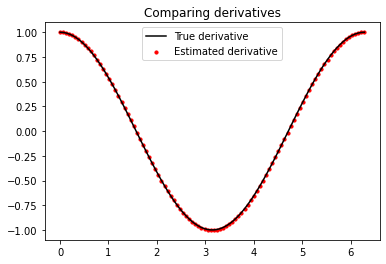

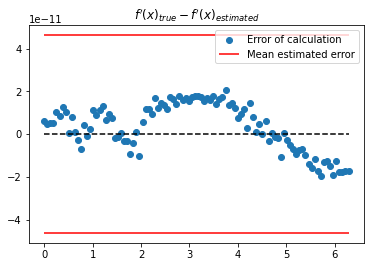

In [23]:
def ndiff(fun, x, full=False):
    """
    The code is fully vectorized, so X can be either float or 1D np.array
    """
    if type(x) == np.ndarray:
        eps = np.finfo(x[0]).eps
    else:
        eps = np.finfo(x).eps

    dx = np.power(eps, 1. / 3.)
    drv = (fun(x + dx) - fun(x - dx)) / (2 * dx)
    
    if not full:
        return drv
    
    err = np.abs(2 * pow(eps, 2. / 3.) * fun(x))
    return drv, dx, err
    

# Test for sin(x)
x = np.linspace(0, 2 * np.pi, 100)
y_drv, dx, y_err = ndiff(np.sin, x, full=True)

plt.plot(x, np.cos(x), c='k', label='True derivative')
plt.scatter(x, y_drv, s=10,  c='red', label='Estimated derivative')
plt.title('Comparing derivatives')
plt.legend()
plt.show()

plt.scatter(x, np.cos(x) - y_drv, label='Error of calculation')
plt.hlines(0, np.min(x), np.max(x), color='k', linestyle='--')
plt.hlines([np.mean(y_err), -np.mean(y_err)], np.min(x), np.max(x), color='r', label='Mean estimated error')
plt.legend()
plt.title(r"$f'(x)_{true} - f'(x)_{estimated}$")
plt.show()

# Problem 3

For interpolation __[Cubic Hermite splines](https://en.wikipedia.org/wiki/Cubic_Hermite_spline)__ were used. First derivative $\frac{dV}{dT}$ is rapidly changing on some intervals. Basic polynomial interpolation could ''jiggle'' between some points. Cubic Hermite splines are applied for each interval $(x_i, x_{i+1})$ separately using first derivatives, which means more precise interpolation in ''problematic'' intervals. 

Since cubic hermite splines require only two points (and two derivatives) for interpolation, we could use points [1:-1] for error estimation. For i in range(1, N), we remove the $x_i$ and estimate $y'_i$ from interpolation between $x_{i-1}$ and $x_{i+1}$. The absolute error in each point is $\varepsilon_i = |y_i - y'_i|$. Finally, total error is $\varepsilon = \sqrt{\frac{\sum_{i=1}^{N-1}\varepsilon_i^2}{N-2-1}}$. Obviosly, that will overestimate the error, but we can use it as an ''upper limit'' of the true error. 

In case of Lakeshore, $T$ is given with accuracy $\sim 0.1$ and the calculated upper limit of error $\approx 0.2$, which is acceptable for this problem.

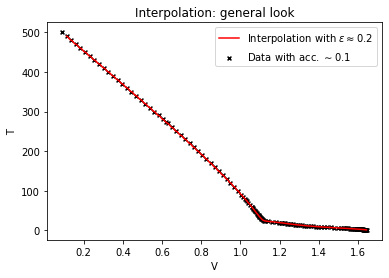

In [24]:
def chspline(x, x0, x1, y0, y1, m0, m1):
    """
    Implementation of the Cubic Hermite splines algorithm from Wikipedia
    """
    t = (x - x0) / (x1 - x0)
    t2 = t*t
    t3 = t2*t
    h00 = 2 * t3 - 3 * t2 + 1
    h10 = t3 - 2 * t2 + t
    h01 = -2 * t3 + 3 * t2
    h11 = t3 - t2
    
    return h00 * y0 + (x1 - x0) * (h10 * m0 + h11 * m1) + h01 * y1


def lakeshore(V, data, return_error=False):
    """
    The code is fully vectorized, so V can be either float or 1D np.array
    """
    t_data = data[:, 0]
    v_data = data[:, 1]
    
#     dV/dT -> dT/dV
    dtdv_data = 1. / data[:, 2]
    
#     np.searchsorted returns the potential position of an element in the sorted array. 
#     I use it to find the index of the right-side neighbour. The minus before is because of the v_data, 
#     which is sorted in descending order. We first invert it with v_data[::-1] to find the
#     index in inverted array, but to use with non-inverted data we must invert index with '-'.
    idx = -np.searchsorted(v_data[::-1], V)
    
    if any(np.in1d([0, -len(v_data)], idx)):
        raise ValueError("Some of passed points are out of range of interpolation.")
    
    v0 = v_data[idx - 1]
    v1 = v_data[idx]
    t0 = t_data[idx - 1]
    t1 = t_data[idx]
    dtdv0 = dtdv_data[idx - 1]
    dtdv1 = dtdv_data[idx]
    
    t_est = chspline(V, v0, v1, t0, t1, dtdv0, dtdv1)
    
    if return_error:
        idx_err = np.arange(1, len(data)-1)
        v0_err = v_data[idx_err - 1]
        v1_err = v_data[idx_err + 1]
        t0_err = t_data[idx_err - 1]
        t1_err = t_data[idx_err + 1]
        dtdv0_err = dtdv_data[idx_err - 1]
        dtdv1_err = dtdv_data[idx_err + 1]
        t_bs = chspline(v_data[idx_err], v0_err, v1_err, t0_err, t1_err, dtdv0_err, dtdv1_err)
        err = np.sqrt(np.power(t_bs - t_data[idx_err], 2).sum() / (len(idx_err) - 1)) 
        return t_est, err
            
    
    return t_est


data = np.loadtxt('lakeshore.txt')

vv = np.linspace(data[1][1], data[-2][1], 500)
t_est, err = lakeshore(vv, data, return_error=True)
plt.plot(vv, t_est, c='r', label=fr'Interpolation with $\varepsilon \approx {err:.1f}$')
plt.scatter(data[:, 1], data[:, 0], s=15, color='k', marker='x', label=fr'Data with acc. $\sim${data[1][0] - data[0][0]:.1f}')
plt.xlabel('V')
plt.ylabel('T')
plt.legend()
plt.title('Interpolation: general look')
plt.show()

# Problem 4

Polinomial interpolation shows good result for cos(x) with $\varepsilon \sim 10^{-7}$, but it's not good for iterpolation of Lorentzian ($\varepsilon \sim 10^{-3}$).

Cubic splines interpolation shows stable error both for cos(x) and Lorenzian: $\varepsilon \sim 10^{-4}$.

Rational function interpolation also shows good result for cos(x) ($\varepsilon \sim 10^{-7}$) regardless of which function for matrix inversion do we use. 
For Lorenzian we can expect $\varepsilon \sim \varepsilon_{\text{float} } \approx 10^{-16}$ because $L(x) = \frac{1}{1 + x^2}$, which is rational function itself.But when using np.linalg.inv the error surprisingly turns out to be $\sim 1$. Values in p-vector and q-vector also turn out to be large, which means that values in the inverted matrix of coefficients $\hat{A}$ are also big. Obviously, the problem is in inversion procedure. So the $\hat{A}$ must be a singular matrix, determinant of which is very close to zero. When we try to compute inverse matrix using straightforward approach, we have small vaule of determinant in the denominator, so result values will be large. This problem can be solved with using np.linalg.pinv, which tries to deal with singular matrices. As a result, after using np.linalg.pinv the error becomes $\varepsilon \sim 10^{-15}$, which is very close to the expected value.

In [25]:
# My own implementation of polynomial interpolation and rational function interpolation. 
# For cubic splines I used scipy.interpolate.splrep

def poly_interp(x, x_data, y_data, inv_func=np.linalg.inv):
    X = np.power(x_data.reshape(-1, 1), np.arange(len(x_data + 1))[::-1])
    a = inv_func(X) @ y_data
    return np.polyval(a, x)

def ratio_interp(x, x_data, y_data, n, m, inv_func=np.linalg.inv, return_pq = False):
    npt = len(x_data)
    if len(y_data) != npt:
        raise ValueError("x and y must have same dimensions.")
    if n < 0:
        raise ValueError("n must be >= 0.")
    if m < 0:
        raise ValueError("m must be >= 0.")
    if m + n + 1 != npt:
        raise ValueError("m + n + 1 must be equal to len(x).")
    A = np.hstack([
            np.power(x_data.reshape(-1, 1), np.arange(n + 1)),
            - y_data.reshape(-1, 1) * np.power(x_data.reshape(-1, 1), np.arange(1, m + 1))
    ])
    pars = inv_func(A) @ y_data
    p = pars[:n + 1]
    q = pars[n + 1:]
    y = np.polyval(p[::-1], x) / (np.polyval(q[::-1], x) * x + 1)
    if return_pq:
        return y, p, q
    return y

In [26]:
def calc_print_errors(lbound, rbound, npoints, func, funcstr, inv_func):
    """
    Calculates and print out errors for different interpolation methods.
    - [lbound, rbound] - working interval
    - npoints - number of points used during interpolation
    - func - function to interpolate
    - funcstr - name of function (for better readability of the output)
    - inv_func - function for matrix inversion: either np.linalg.inv or np.linalg.pinv
    """
    x = np.linspace(lbound, rbound, npoints)
    y = func(x)
    x_test = np.linspace(lbound, rbound, 100)
    y_test = func(x_test)
    y_test_poly = poly_interp(x_test, x, y, inv_func=inv_func)
    m = len(y) // 2
    n = len(y) - m - 1
    y_test_ratio, p, q = ratio_interp(x_test, x, y, n, m, inv_func=inv_func, return_pq=True)
    spln = splrep(x, y)
    y_test_csplines = splev(x_test, spln)
    p_err = np.sqrt(np.power((y_test-y_test_poly), 2).sum() / (len(x_test)))
    cs_err = np.sqrt(np.power((y_test-y_test_csplines), 2).sum() / (len(x_test)))
    rf_err = np.sqrt(np.power((y_test-y_test_ratio), 2).sum() / (len(x_test)))
    print(f"Errors for {funcstr} using np.linalg.{inv_func.__name__}:")
    print(f"- Polynomial error:\t{p_err:1.1e}")
    print(f"- Cubic splines error:\t{cs_err:1.1e}")
    print(f"- Rat. func. error:\t{rf_err:1.1e}")
    print(f"p values: {p}")
    print(f"q values: {q}\n")



calc_print_errors(-np.pi / 2, np.pi / 2, 9, np.cos, 'cos(x)', np.linalg.inv)
calc_print_errors(-np.pi / 2, np.pi / 2, 9, np.cos, 'cos(x)', np.linalg.pinv)
calc_print_errors(-1, 1, 9, lambda x: 1 / (1 + x**2), ' 1 / (1 + x**2)', np.linalg.inv)
calc_print_errors(-1, 1, 9, lambda x: 1 / (1 + x**2), ' 1 / (1 + x**2)', np.linalg.pinv)

Errors for cos(x) using np.linalg.inv:
- Polynomial error:	1.4e-07
- Cubic splines error:	1.0e-04
- Rat. func. error:	1.9e-07
p values: [ 1.00000000e+00  3.65789322e-13 -4.55500018e-01 -1.18637705e-13
  2.03514880e-02]
q values: [3.44340260e-13 4.44998467e-02 1.83293495e-14 9.35994100e-04]

Errors for cos(x) using np.linalg.pinv:
- Polynomial error:	1.4e-07
- Cubic splines error:	1.0e-04
- Rat. func. error:	1.9e-07
p values: [ 1.00000000e+00 -4.15590403e-14 -4.55500018e-01 -2.11072659e-14
  2.03514880e-02]
q values: [ 3.07114930e-14  4.44998467e-02 -6.61068346e-15  9.35994100e-04]

Errors for  1 / (1 + x**2) using np.linalg.inv:
- Polynomial error:	7.6e-04
- Cubic splines error:	3.5e-04
- Rat. func. error:	6.6e+00
p values: [326.37588235 776.         188.         -19.22415686 -59.34086275]
q values: [776. 444. 280. -24.]

Errors for  1 / (1 + x**2) using np.linalg.pinv:
- Polynomial error:	7.6e-04
- Cubic splines error:	3.5e-04
- Rat. func. error:	1.0e-15
p values: [ 1.00000000e+00  2.